## Load data

In [1]:
import pandas as pd

house_price_data = './house_prices.csv'
df = pd.read_csv(house_price_data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
#
columns = df.columns.tolist()
print(columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [3]:
# choose specific columns
x = df['LotArea']
y = df['SalePrice']
print(x, y)

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


Text(0, 0.5, 'Sale Price')

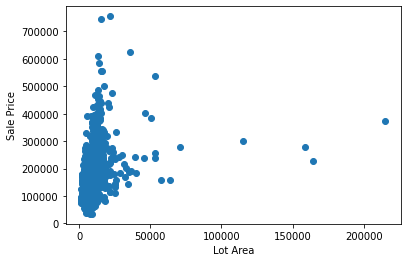

In [4]:
import matplotlib.pyplot as plt

# visualize the data
plt.scatter(x, y)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

## Data normalization

Text(0, 0.5, 'Sale Price')

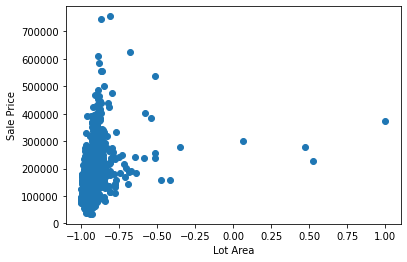

In [5]:
import numpy as np

# normalize the input to (-1, 1)
# (x-np.min(x)) / (np.max(x) - np.min(x)) would normalize to (0, 1)
x = 2 * (x-np.min(x)) / (np.max(x) - np.min(x)) - 1

plt.scatter(x, y)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

In [6]:
print(np.power(x, 3))

0      -0.812585
1      -0.784823
2      -0.746107
3      -0.786017
4      -0.678798
          ...   
1455   -0.825671
1456   -0.702572
1457   -0.798214
1458   -0.782035
1459   -0.776810
Name: LotArea, Length: 1460, dtype: float64


## Model training

In [7]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)

xpoly = poly.fit_transform(np.transpose([x]))
print(xpoly)

[[ 1.         -0.93316039  0.87078832 -0.81258517  0.75827229 -0.70758967]
 [ 1.         -0.92240997  0.85084014 -0.78482343  0.72392895 -0.66775928]
 [ 1.         -0.90698544  0.82262259 -0.74610671  0.67670792 -0.61376423]
 ...
 [ 1.         -0.92762626  0.86049048 -0.79821356  0.74044386 -0.68685517]
 [ 1.         -0.92131623  0.84882359 -0.78203495  0.72050148 -0.66380971]
 [ 1.         -0.91925962  0.84503825 -0.77680955  0.71408965 -0.65643378]]


In [8]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xpoly, y)

LinearRegression()

Text(0, 0.5, 'Sale Price')

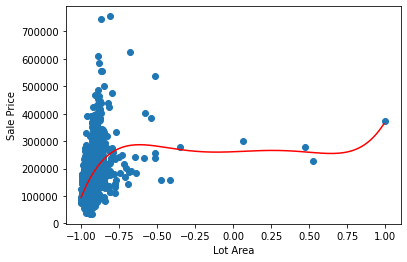

In [9]:
# try to see the predicted value for each x
xrange = np.arange(-1, 1, 0.01) # return row vector

xrange_poly = poly.transform(np.transpose([xrange]))
yrange = reg.predict(xrange_poly)

plt.scatter(x, y)
plt.plot(xrange, yrange, "r")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

In [10]:
from sklearn.metrics import mean_squared_error

pred = reg.predict(xpoly)
mse = mean_squared_error(y, pred)
print(mse)

5198739580.924991


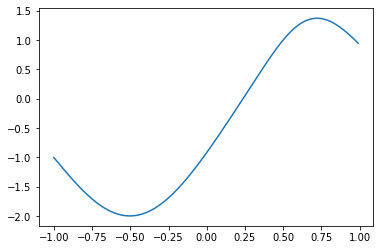

In [11]:
xrange = np.arange(-1, 1, 0.01)
newy = np.sin(3.14*xrange) + np.tanh(3.14*(xrange-0.5))

plt.plot(xrange, newy)

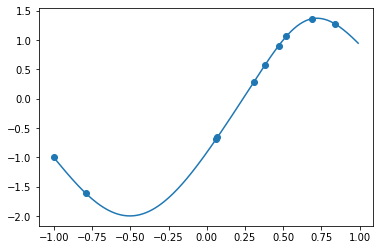

In [12]:
np.random.seed(3)
inds = np.random.randint(xrange.shape[0],size=10)

x_train = xrange[inds]
y_train = newy[inds]
plt.scatter(x_train,y_train)
plt.plot(xrange,newy)

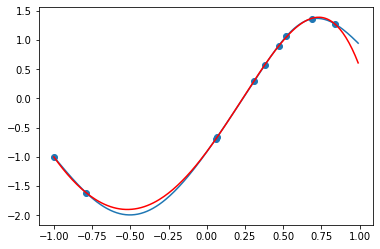

In [13]:
poly = PolynomialFeatures(degree=5) # change the degree to get more complex regressor
poly.fit(np.transpose([x_train]))
x_train_poly = poly.transform(np.transpose([x_train]))

reg = linear_model.LinearRegression()
reg.fit(x_train_poly,y_train)

x_poly = poly.transform(np.transpose([xrange]))
pred = reg.predict(x_poly)
plt.scatter(x_train,y_train)
plt.plot(xrange,newy)
plt.plot(xrange,pred,color='r')

## Multi-variable

In [14]:
import pandas as pd
url = './house_prices.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
x = df[["LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd","GarageArea"]] # difference ml methond can helo to select the feature.
y = df["SalePrice"]
x = x.to_numpy()
y = y.to_numpy()
print(x)

[[ 8450     7     5  2003  2003   548]
 [ 9600     6     8  1976  1976   460]
 [11250     7     5  2001  2002   608]
 ...
 [ 9042     7     9  1941  2006   252]
 [ 9717     5     6  1950  1996   240]
 [ 9937     5     6  1965  1965   276]]


In [17]:
# Split data
x_train = x[:1000,:]
x_test  = x[1000:,:]
y_train = y[:1000]
y_test  = y[1000:]

In [18]:
# normalise data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm  = scaler.transform(x_test)
print(x_train_norm)

[[-0.93316039  0.33333333  0.          0.89855072  0.76666667 -0.22708039]
 [-0.92240997  0.11111111  0.75        0.50724638 -0.13333333 -0.35119887]
 [-0.90698544  0.33333333  0.          0.86956522  0.73333333 -0.14245416]
 ...
 [-0.90261983  0.11111111  0.25        0.42028986 -0.33333333 -0.1325811 ]
 [-0.9206712  -0.55555556 -0.25       -0.27536232 -1.         -0.70380818]
 [-0.94894015  0.33333333  0.          0.94202899  0.86666667 -0.10860367]]


In [19]:
# Create polynomial feature
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
poly.fit(x_train_norm)
x_train_poly = poly.transform(x_train_norm)
x_test_poly = poly.transform(x_test_norm)

In [20]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
def run(model):
    model.fit(x_train_poly,y_train)
    pred = model.predict(x_test_poly)
    mse = mean_squared_error(y_test,pred)
    print("Mean square error: %f"%(mse))
    plt.scatter(pred,y_test)
    plt.xlabel("Predicted prices")
    plt.ylabel("Actual prices")

Mean square error: 13157195820623145730048.000000


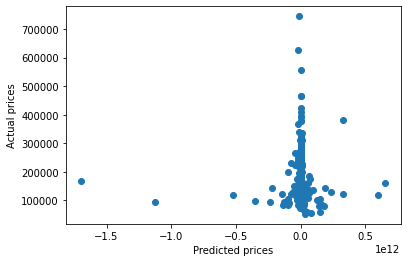

In [21]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
run(lr)

Mean square error: 1524939658.646124


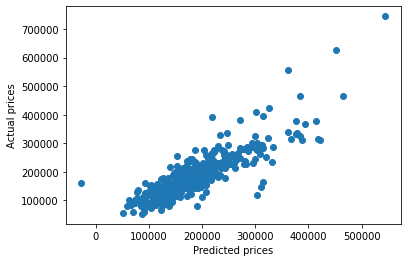

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.9) # alpha: Constant that multiplies the L2 term
run(ridge)

Mean square error: 1266817854.024276


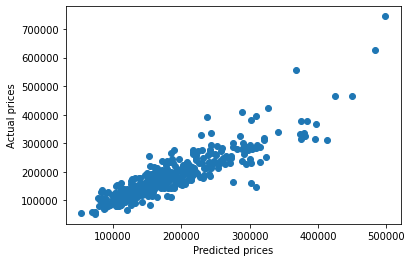

In [23]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=75, max_iter=1500) # alpha is the Constant that multiplies the L1 term
run(clf)

Mean square error: 1603219388.403568


c:\Users\billz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.914e+11, tolerance: 6.440e+08
  model = cd_fast.enet_coordinate_descent(


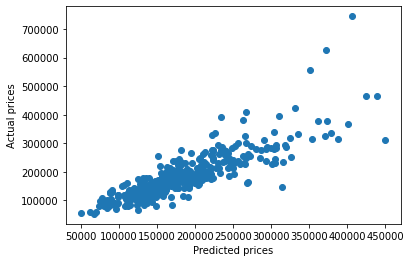

In [24]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.4, l1_ratio=0.8)
run(en)

## Ensemble of regressors

Mean square error: 1812723236.274607


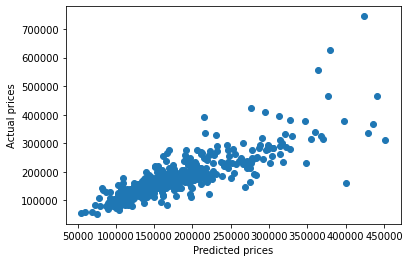

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
run(rfr)

Mean square error: 2353523422.635813


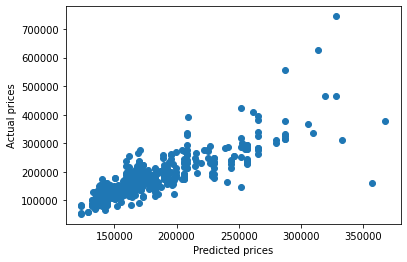

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10)
run(gbr)

c:\Users\billz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.914e+11, tolerance: 6.440e+08
  model = cd_fast.enet_coordinate_descent(


Mean square error: 1414546857.052932


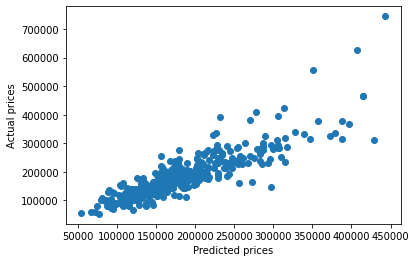

In [27]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR

estimators = [
    ("ridge",Ridge(alpha=0.9)),
    ("lasso",Lasso(alpha=75, max_iter=1500)),
    ("enet",ElasticNet(alpha=0.4, l1_ratio=0.8)),
    ("svr",SVR(C=100,kernel="linear")),
    ("rfr",RandomForestRegressor(n_estimators=15))
]

vr = VotingRegressor(estimators)
run(vr)